<a href="https://colab.research.google.com/github/victoria2012/test_deeplearning/blob/master/reuter_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf

In [45]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [46]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [47]:
len(x_train[50]), len(x_train[400]), len(x_train[200]), len(x_train[600])

(118, 90, 212, 207)

In [48]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [49]:
import numpy as np

In [50]:
len(np.unique(y_train)), np.unique(y_train).shape

(46, (46,))

# make model

In [51]:
model = tf.keras.models.Sequential()

In [52]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000, output_dim=24))  # input layer    # 벡터 방식으로 변환시켜줘야 한다. 이 때 input_dim은 사전의 사이즈, output_dim은 차원을 지정 
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
# model.add(tf.keras.layers.Flatten())  # hidden layer  # dense는 1차원으로 들어와야 한다. 그래서 1차원으로 변형시켜줘야 하는데 이런 역할을 하는 것이 Flatten이다.  
model.add(tf.keras.layers.Dense(46, activation='softmax'))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])   #gadget

In [53]:
# hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)              # epochs는 default가 1이다. 따라서 아무것도 안쓰면 1번만 실행
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256) 

Epoch 1/100
25/25 [==============================] - 22s 738ms/step - loss: 3.7332 - acc: 0.1675 - val_loss: 3.4466 - val_acc: 0.2215
Epoch 2/100
25/25 [==============================] - 18s 706ms/step - loss: 3.2134 - acc: 0.2150 - val_loss: 2.9539 - val_acc: 0.2215
Epoch 3/100
25/25 [==============================] - 18s 708ms/step - loss: 2.8364 - acc: 0.2150 - val_loss: 2.6693 - val_acc: 0.2215
Epoch 4/100
25/25 [==============================] - 18s 707ms/step - loss: 2.6251 - acc: 0.2150 - val_loss: 2.5196 - val_acc: 0.2215
Epoch 5/100
25/25 [==============================] - 17s 701ms/step - loss: 2.5121 - acc: 0.2430 - val_loss: 2.4440 - val_acc: 0.3532
Epoch 6/100
25/25 [==============================] - 18s 708ms/step - loss: 2.4581 - acc: 0.3510 - val_loss: 2.4115 - val_acc: 0.3532
Epoch 7/100
25/25 [==============================] - 18s 707ms/step - loss: 2.4358 - acc: 0.3510 - val_loss: 2.3967 - val_acc: 0.3532
Epoch 8/100
25/25 [==============================] - 18s 706ms

# Evaluation

In [54]:
# 학습시켰던 데이터
model.evaluate(pad_x_train, y_train)

281/281 [==============================] - 17s 62ms/step - loss: 1.0593 - acc: 0.7555


[1.059345006942749, 0.7555110454559326]

* LSTM(24), epochs : 1 ---> loss: 2.2707 - acc: 0.3517
* LSTM(24), LSTM(12), epochs : 1  ---> loss: 3.1497 - acc: 0.3517
* LSTM(24), LSTM(12), epochs : 5  ---> loss: 2.4067 - acc: 0.3517
* LSTM(24), LSTM(12), epochs : 5  ---> loss: 1.0593 - acc: 0.7555

In [55]:
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [56]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [57]:
pad_make_x = pad_make(x_test)

In [58]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 4s 61ms/step - loss: 1.8810 - acc: 0.5779


[1.8810150623321533, 0.5779163241386414]

In [59]:
model.evaluate(pad_x_test, y_test)                         # acc 보니 학습이 잘되었다고 볼 수 있다. 

71/71 [==============================] - 4s 62ms/step - loss: 1.8810 - acc: 0.5779


[1.8810150623321533, 0.5779163241386414]

In [60]:
import matplotlib.pyplot as plt

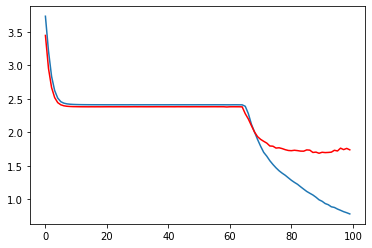

In [64]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'r-')
plt.show()

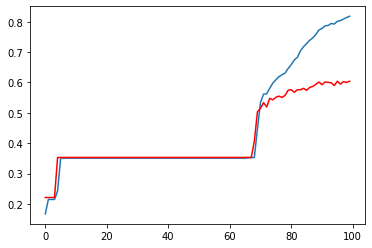

In [63]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

In [67]:
from sklearn.metrics import classification_report

In [72]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([9.7874319e-05, 5.2679935e-03, 5.6975037e-05, 9.3857163e-01,
       4.1382071e-02, 1.2516118e-04, 6.0457653e-05, 8.5596163e-05,
       9.7193447e-04, 7.4867850e-05, 2.6299956e-04, 7.3513627e-04,
       2.4845218e-04, 6.6188298e-04, 1.0148310e-04, 4.8853479e-05,
       5.5034305e-03, 8.3645471e-05, 7.4278003e-05, 1.5922571e-03,
       1.2632216e-03, 2.7873769e-04, 6.7897010e-05, 6.7743007e-05,
       1.0297619e-04, 1.0042665e-04, 5.3708292e-05, 6.7108223e-05,
       7.5089374e-05, 8.3577776e-05, 1.9291362e-04, 1.2768773e-04,
       1.6317669e-04, 6.5529232e-05, 2.8366633e-04, 7.1062888e-05,
       2.6729258e-04, 4.0577699e-05, 1.3474569e-04, 7.7283759e-05,
       6.5212531e-05, 1.2587401e-04, 6.5022374e-05, 7.4253992e-05,
       4.1495667e-05, 3.6762915e-05], dtype=float32)

In [77]:
import numpy as np
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [78]:
len(y_train)

8982

In [79]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.71      0.80      0.75       432
           2       0.00      0.00      0.00        74
           3       0.93      0.96      0.95      3159
           4       0.90      0.92      0.91      1949
           5       0.00      0.00      0.00        17
           6       0.35      0.35      0.35        48
           7       0.00      0.00      0.00        16
           8       0.52      0.24      0.33       139
           9       0.40      0.71      0.51       101
          10       0.42      0.73      0.53       124
          11       0.67      0.75      0.71       390
          12       0.00      0.00      0.00        49
          13       0.52      0.70      0.60       172
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        20
          16       0.53      0.71      0.61       444
          17       0.60    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
y_test_pred = model.predict(pad_x_test)

In [81]:
y_pred = np.argmax(y_test_pred, axis=1)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.35      0.46      0.39       105
           2       0.00      0.00      0.00        20
           3       0.87      0.91      0.89       813
           4       0.77      0.76      0.76       474
           5       0.00      0.00      0.00         5
           6       0.20      0.07      0.11        14
           7       0.00      0.00      0.00         3
           8       0.03      0.03      0.03        38
           9       0.00      0.00      0.00        25
          10       0.17      0.27      0.21        30
          11       0.18      0.27      0.21        83
          12       0.00      0.00      0.00        13
          13       0.07      0.16      0.10        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.25      0.36      0.30        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
